<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20690%20NLP/Data_690_NLP_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1

1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-
movie-reviews/data

2. Take a look at the data and get info about the data
3. Count the number of expressed sentiments by category
4. Provide a histogram of sentiments by category
5. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers
6. Split dataset (the test dataset represents 30% of the total data).
7. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.
8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.
9. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.
10.Build the Text Classification Model using TF-IDF.
11.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.
12.Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_1=pd.read_csv("https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/train.tsv", sep='\t')
df_1.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
df_1.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
df_1.shape

(156060, 4)

In [6]:
df_1['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5299e1550>]],
      dtype=object)

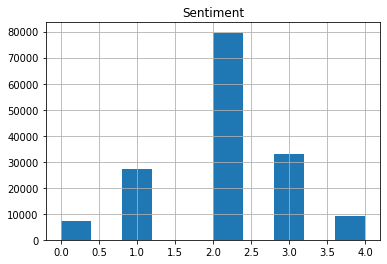

In [7]:
df_1.hist(column='Sentiment')

In [8]:
import re
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
#from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [9]:
tokens = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [10]:
count_v = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = tokens.tokenize)
text_counts= count_v.fit_transform(df_1['Phrase'])
count_v

CountVectorizer(stop_words='english',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(text_counts, df_1['Sentiment'], test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [14]:
clf = MultinomialNB().fit(x_train, y_train)

In [15]:
predicted_result= clf.predict(x_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted_result))

MultinomialNB Accuracy: 0.6064975009611688


In [16]:
tf=TfidfVectorizer()

text_tf= tf.fit_transform(df_1['Phrase'])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(text_tf, df_1['Sentiment'], test_size=0.3, random_state=42)

In [19]:
clf = MultinomialNB().fit(x_train, y_train)
predicted= clf.predict(x_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5815284719552309


Exercise 2
1. Create an account with AWS.
2. Navigate to Amazon Comprehend. Check the documentation under the ‘DATA
690 Resources’.
3. Use the ‘Digital_Press_Sentiment.txt’ file to measure sentiment.
4. What are the entities and key phrases?

The sentiment of the text is as follows:


{"File": "digital_press_sentiment.txt", "Line": 2, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.01050309557467699, "Negative": 0.13323000073432922, "Neutral": 0.8370556831359863, "Positive": 0.019211260601878166}}

{"File": "digital_press_sentiment.txt", "Line": 0, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.03750487044453621, "Negative": 0.45717084407806396, "Neutral": 0.4963161051273346, "Positive": 0.009008055552840233}}

{"File": "digital_press_sentiment.txt", "Line": 4, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.0028448267839848995, "Negative": 0.23049569129943848, "Neutral": 0.7550657391548157, "Positive": 0.011593766510486603}}

{"File": "digital_press_sentiment.txt", "Line": 3, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.007208747789263725, "Negative": 0.04181428998708725, "Neutral": 0.92505943775177, "Positive": 0.025917595252394676}}

{"File": "digital_press_sentiment.txt", "Line": 1, "Sentiment": "POSITIVE", "SentimentScore": {"Mixed": 0.043566156178712845, "Negative": 0.03873129561543465, "Neutral": 0.40551385283470154, "Positive": 0.5121886730194092}}

{"File": "digital_press_sentiment.txt", "Line": 5, "Sentiment": "NEUTRAL", "SentimentScore": {"Mixed": 0.009337893687188625, "Negative": 0.4201979637145996, "Neutral": 0.5601200461387634, "Positive": 0.010344035923480988}}

- From the above sentiment analysis result we can see that using AWS comprehend we get line wise sentiment of the input text.
- Analysing the sentiment of each line we can see that the overall text is neutral.

The entities output is as follows:


{"Entities": [{"BeginOffset": 4, "EndOffset": 18, "Score": 0.7068233365613917, "Text": "United Kingdom", "Type": "ORGANIZATION"}, {"BeginOffset": 28, "EndOffset": 31, "Score": 0.9786273835246497, "Text": "one", "Type": "QUANTITY"}, {"BeginOffset": 39, "EndOffset": 55, "Score": 0.6154102640749735, "Text": "worst recessions", "Type": "QUANTITY"}, {"BeginOffset": 78, "EndOffset": 87, "Score": 0.9982999912078382, "Text": "last year", "Type": "DATE"}, {"BeginOffset": 89, "EndOffset": 96, "Score": 0.8839851444595728, "Text": "Germany", "Type": "ORGANIZATION"}, {"BeginOffset": 133, "EndOffset": 141, "Score": 0.9706624988508165, "Text": "pandemic", "Type": "EVENT"}, {"BeginOffset": 165, "EndOffset": 188, "Score": 0.8739415544220246, "Text": "global financial crisis", "Type": "EVENT"}, {"BeginOffset": 220, "EndOffset": 226, "Score": 0.8974571235160999, "Text": "Europe", "Type": "ORGANIZATION"}, {"BeginOffset": 259, "EndOffset": 261, "Score": 0.9961087927707357, "Text": "5%", "Type": "QUANTITY"}, {"BeginOffset": 262, "EndOffset": 271, "Score": 0.9954193088114317, "Text": "last year", "Type": "DATE"}, {"BeginOffset": 273, "EndOffset": 275, "Score": 0.9903052035025196, "Text": "EU", "Type": "ORGANIZATION"}, {"BeginOffset": 319, "EndOffset": 323, "Score": 0.998907478494082, "Text": "6.4%", "Type": "QUANTITY"}, {"BeginOffset": 338, "EndOffset": 346, "Score": 0.998289654419616, "Text": "Eurostat", "Type": "ORGANIZATION"}], "File": "digital_press_sentiment.txt", "Line": 0}
{"Entities": [{"BeginOffset": 4, "EndOffset": 17, "Score": 0.9489941060668154, "Text": "United States", "Type": "ORGANIZATION"}, {"BeginOffset": 56, "EndOffset": 59, "Score": 0.832075142938795, "Text": "GDP", "Type": "OTHER"}, {"BeginOffset": 74, "EndOffset": 78, "Score": 0.9985064641358451, "Text": "3.5%", "Type": "QUANTITY"}, {"BeginOffset": 88, "EndOffset": 98, "Score": 0.8452196575740594, "Text": "prior year", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 1}
{"Entities": [{"BeginOffset": 1, "EndOffset": 6, "Score": 0.9801134800752463, "Text": "Today", "Type": "DATE"}, {"BeginOffset": 90, "EndOffset": 98, "Score": 0.6537684914029626, "Text": "pandemic", "Type": "EVENT"}, {"BeginOffset": 152, "EndOffset": 154, "Score": 0.929395952869375, "Text": "UK", "Type": "ORGANIZATION"}, {"BeginOffset": 155, "EndOffset": 171, "Score": 0.9279799161895936, "Text": "finance minister", "Type": "PERSON"}, {"BeginOffset": 172, "EndOffset": 183, "Score": 0.9970079770171625, "Text": "Rishi Sunak", "Type": "PERSON"}, {"BeginOffset": 222, "EndOffset": 241, "Score": 0.6458326841289342, "Text": "some positive signs", "Type": "QUANTITY"}, {"BeginOffset": 363, "EndOffset": 374, "Score": 0.8545631252772576, "Text": "many people", "Type": "QUANTITY"}], "File": "digital_press_sentiment.txt", "Line": 2}
{"Entities": [{"BeginOffset": 33, "EndOffset": 47, "Score": 0.9990364874624014, "Text": "United Kingdom", "Type": "LOCATION"}, {"BeginOffset": 60, "EndOffset": 69, "Score": 0.9993896102941885, "Text": "January 5", "Type": "DATE"}, {"BeginOffset": 114, "EndOffset": 135, "Score": 0.9932706818298713, "Text": "first quarter of 2021", "Type": "DATE"}, {"BeginOffset": 175, "EndOffset": 197, "Score": 0.9903546529315606, "Text": "fourth quarter of 2020", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 3}
{"Entities": [{"BeginOffset": 17, "EndOffset": 27, "Score": 0.8721445998672165, "Text": "double dip", "Type": "QUANTITY"}, {"BeginOffset": 90, "EndOffset": 99, "Score": 0.9996725408372323, "Text": "Sam Miley", "Type": "PERSON"}, {"BeginOffset": 121, "EndOffset": 127, "Score": 0.9876439254421928, "Text": "London", "Type": "LOCATION"}, {"BeginOffset": 134, "EndOffset": 176, "Score": 0.9823558391291516, "Text": "Centre for Economics and Business Research", "Type": "ORGANIZATION"}, {"BeginOffset": 195, "EndOffset": 201, "Score": 0.9992315717856975, "Text": "Friday", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 4}
{"Entities": [{"BeginOffset": 14, "EndOffset": 16, "Score": 0.6623356453836039, "Text": "EU", "Type": "ORGANIZATION"}, {"BeginOffset": 17, "EndOffset": 19, "Score": 0.5336123960639858, "Text": "UK", "Type": "LOCATION"}, {"BeginOffset": 51, "EndOffset": 57, "Score": 0.9829043522916916, "Text": "Brexit", "Type": "EVENT"}, {"BeginOffset": 79, "EndOffset": 90, "Score": 0.9986682567473393, "Text": "December 31", "Type": "DATE"}], "File": "digital_press_sentiment.txt", "Line": 5}


The key phrases are:


{"File": "digital_press_sentiment.txt", "KeyPhrases": [{"BeginOffset": 0, "EndOffset": 18, "Score": 0.9998196547281963, "Text": "The United Kingdom"}, {"BeginOffset": 35, "EndOffset": 55, "Score": 0.9999647153925229, "Text": "the worst recessions"}, {"BeginOffset": 62, "EndOffset": 77, "Score": 0.9999758607340028, "Text": "major economies"}, {"BeginOffset": 78, "EndOffset": 87, "Score": 0.9999164412789849, "Text": "last year"}, {"BeginOffset": 89, "EndOffset": 96, "Score": 0.9999361079065316, "Text": "Germany"}, {"BeginOffset": 129, "EndOffset": 141, "Score": 0.9966300903765473, "Text": "the pandemic"}, {"BeginOffset": 161, "EndOffset": 188, "Score": 0.9999770528198643, "Text": "the global financial crisis"}, {"BeginOffset": 190, "EndOffset": 211, "Score": 0.9999408161872623, "Text": "Provisional estimates"}, {"BeginOffset": 220, "EndOffset": 226, "Score": 0.9999836685934766, "Text": "Europe"}, {"BeginOffset": 229, "EndOffset": 244, "Score": 0.9998729816952487, "Text": "biggest economy"}, {"BeginOffset": 259, "EndOffset": 261, "Score": 0.9994872507183857, "Text": "5%"}, {"BeginOffset": 262, "EndOffset": 271, "Score": 0.9993769378083631, "Text": "last year"}, {"BeginOffset": 273, "EndOffset": 279, "Score": 0.9993331755761514, "Text": "EU GDP"}, {"BeginOffset": 319, "EndOffset": 323, "Score": 0.9997556212377327, "Text": "6.4%"}, {"BeginOffset": 338, "EndOffset": 346, "Score": 0.9997989343575443, "Text": "Eurostat"}], "Line": 0}
{"File": "digital_press_sentiment.txt", "KeyPhrases": [{"BeginOffset": 0, "EndOffset": 17, "Score": 0.9999437779025674, "Text": "The United States"}, {"BeginOffset": 39, "EndOffset": 49, "Score": 0.9999141766761902, "Text": "comparison"}, {"BeginOffset": 56, "EndOffset": 59, "Score": 0.9986666361383904, "Text": "GDP"}, {"BeginOffset": 74, "EndOffset": 78, "Score": 0.9997782630034663, "Text": "3.5%"}, {"BeginOffset": 84, "EndOffset": 98, "Score": 0.9999418705429424, "Text": "the prior year"}], "Line": 1}
{"File": "digital_press_sentiment.txt", "KeyPhrases": [{"BeginOffset": 1, "EndOffset": 6, "Score": 0.9997196983330024, "Text": "Today"}, {"BeginOffset": 9, "EndOffset": 16, "Score": 0.999783158725524, "Text": "figures"}, {"BeginOffset": 27, "EndOffset": 38, "Score": 0.9999904633477849, "Text": "the economy"}, {"BeginOffset": 55, "EndOffset": 70, "Score": 0.9999776288924644, "Text": "a serious shock"}, {"BeginOffset": 74, "EndOffset": 82, "Score": 0.9999844434296811, "Text": "a result"}, {"BeginOffset": 86, "EndOffset": 98, "Score": 0.9998743706686344, "Text": "the pandemic"}, {"BeginOffset": 123, "EndOffset": 132, "Score": 0.9999940395710211, "Text": "countries"}, {"BeginOffset": 140, "EndOffset": 149, "Score": 0.9996540392356305, "Text": "the world"}, {"BeginOffset": 152, "EndOffset": 183, "Score": 0.9996630882805502, "Text": "UK finance minister Rishi Sunak"}, {"BeginOffset": 192, "EndOffset": 203, "Score": 0.9999756223421253, "Text": "a statement"}, {"BeginOffset": 222, "EndOffset": 241, "Score": 0.999858523118252, "Text": "some positive signs"}, {"BeginOffset": 245, "EndOffset": 256, "Score": 0.9999915958208745, "Text": "the economy"}, {"BeginOffset": 259, "EndOffset": 269, "Score": 0.9998340341521854, "Text": "resilience"}, {"BeginOffset": 275, "EndOffset": 285, "Score": 0.9999786024825074, "Text": "the winter"}, {"BeginOffset": 300, "EndOffset": 320, "Score": 0.9999895097012077, "Text": "the current lockdown"}, {"BeginOffset": 339, "EndOffset": 359, "Score": 0.9999740529190574, "Text": "a significant impact"}, {"BeginOffset": 363, "EndOffset": 389, "Score": 0.9994578835969689, "Text": "many people and businesses"}], "Line": 2}
{"File": "digital_press_sentiment.txt", "KeyPhrases": [{"BeginOffset": 0, "EndOffset": 25, "Score": 0.9999805991093833, "Text": "The new national lockdown"}, {"BeginOffset": 29, "EndOffset": 47, "Score": 0.9999855361532763, "Text": "the United Kingdom"}, {"BeginOffset": 60, "EndOffset": 69, "Score": 0.9998937369093227, "Text": "January 5"}, {"BeginOffset": 90, "EndOffset": 101, "Score": 0.9999859931061649, "Text": "the economy"}, {"BeginOffset": 110, "EndOffset": 127, "Score": 0.9999882778940519, "Text": "the first quarter"}, {"BeginOffset": 131, "EndOffset": 135, "Score": 0.9999858142961154, "Text": "2021"}, {"BeginOffset": 147, "EndOffset": 157, "Score": 0.9998838467087379, "Text": "the return"}, {"BeginOffset": 161, "EndOffset": 167, "Score": 0.9997528210462462, "Text": "growth"}, {"BeginOffset": 171, "EndOffset": 189, "Score": 0.9999889533947551, "Text": "the fourth quarter"}, {"BeginOffset": 193, "EndOffset": 197, "Score": 0.9999927282861518, "Text": "2020"}], "Line": 3}
{"File": "digital_press_sentiment.txt", "KeyPhrases": [{"BeginOffset": 15, "EndOffset": 39, "Score": 0.9778227255168761, "Text": "a double dip [recession]"}, {"BeginOffset": 90, "EndOffset": 99, "Score": 0.9998250911346096, "Text": "Sam Miley"}, {"BeginOffset": 101, "EndOffset": 113, "Score": 0.9998977886132547, "Text": "an economist"}, {"BeginOffset": 117, "EndOffset": 140, "Score": 0.9999647392403305, "Text": "the London-based Centre"}, {"BeginOffset": 145, "EndOffset": 176, "Score": 0.9831502951257123, "Text": "Economics and Business Research"}, {"BeginOffset": 185, "EndOffset": 191, "Score": 0.9999704968122731, "Text": "a note"}, {"BeginOffset": 195, "EndOffset": 201, "Score": 0.9999576824925632, "Text": "Friday"}], "Line": 4}
{"File": "digital_press_sentiment.txt", "KeyPhrases": [{"BeginOffset": 0, "EndOffset": 10, "Score": 0.9996690653472826, "Text": "Disruption"}, {"BeginOffset": 14, "EndOffset": 25, "Score": 0.9996132128772258, "Text": "EU-UK trade"}, {"BeginOffset": 36, "EndOffset": 43, "Score": 0.9999850394947732, "Text": "the end"}, {"BeginOffset": 47, "EndOffset": 75, "Score": 0.9999294651457875, "Text": "the Brexit transition period"}, {"BeginOffset": 79, "EndOffset": 90, "Score": 0.9999163250098102, "Text": "December 31"}, {"BeginOffset": 111, "EndOffset": 119, "Score": 0.9999945164027223, "Text": "activity"}], "Line": 5}

Exercise 3
1. Create an account with IBM Cloud
2. Use IBM Watson Natural Language Understanding/Text Analysis to run the same
sentiment analysis as in Exercise 2.
3. Is there any difference in the results? What is IBM’s philosophy in sentiment
analysis?

Sentiment analysis score:

![](https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/Screen-Shot-2022-09-20-at-10.28.19-PM.jpeg)

- Entity sentiment score:


![](https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/Screen-Shot-2022-09-20-at-9.58.08-PM.jpeg)

- Keyword sentiment score:

![](https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/Screen-Shot-2022-09-20-at-9.58.55-PM.jpeg)

![](https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/Screen-Shot-2022-09-20-at-9.59.08-PM.jpeg)

3. Is there any difference in the results? What is IBM’s philosophy in sentiment
analysis?

- AWS Comprehend gives the sentiment line wise whereas the in IBM it gives the sentiment of the overall document.
- In AWS Comprehend the overall sentiment of the text is 'Neutral' whereas in IBM the overall sentiment of the text is 'Negative'
- AWS offers keyphrases whereas IBM offers keywords in its analysis